# **Prédiction de la capacité de résistance du beton**

In [1]:
import pandas as pd
import numpy as np

# **Importation du jeu de données**

In [57]:
data = pd.read_csv("concrete.csv")

# **Analyse exploratoire**

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


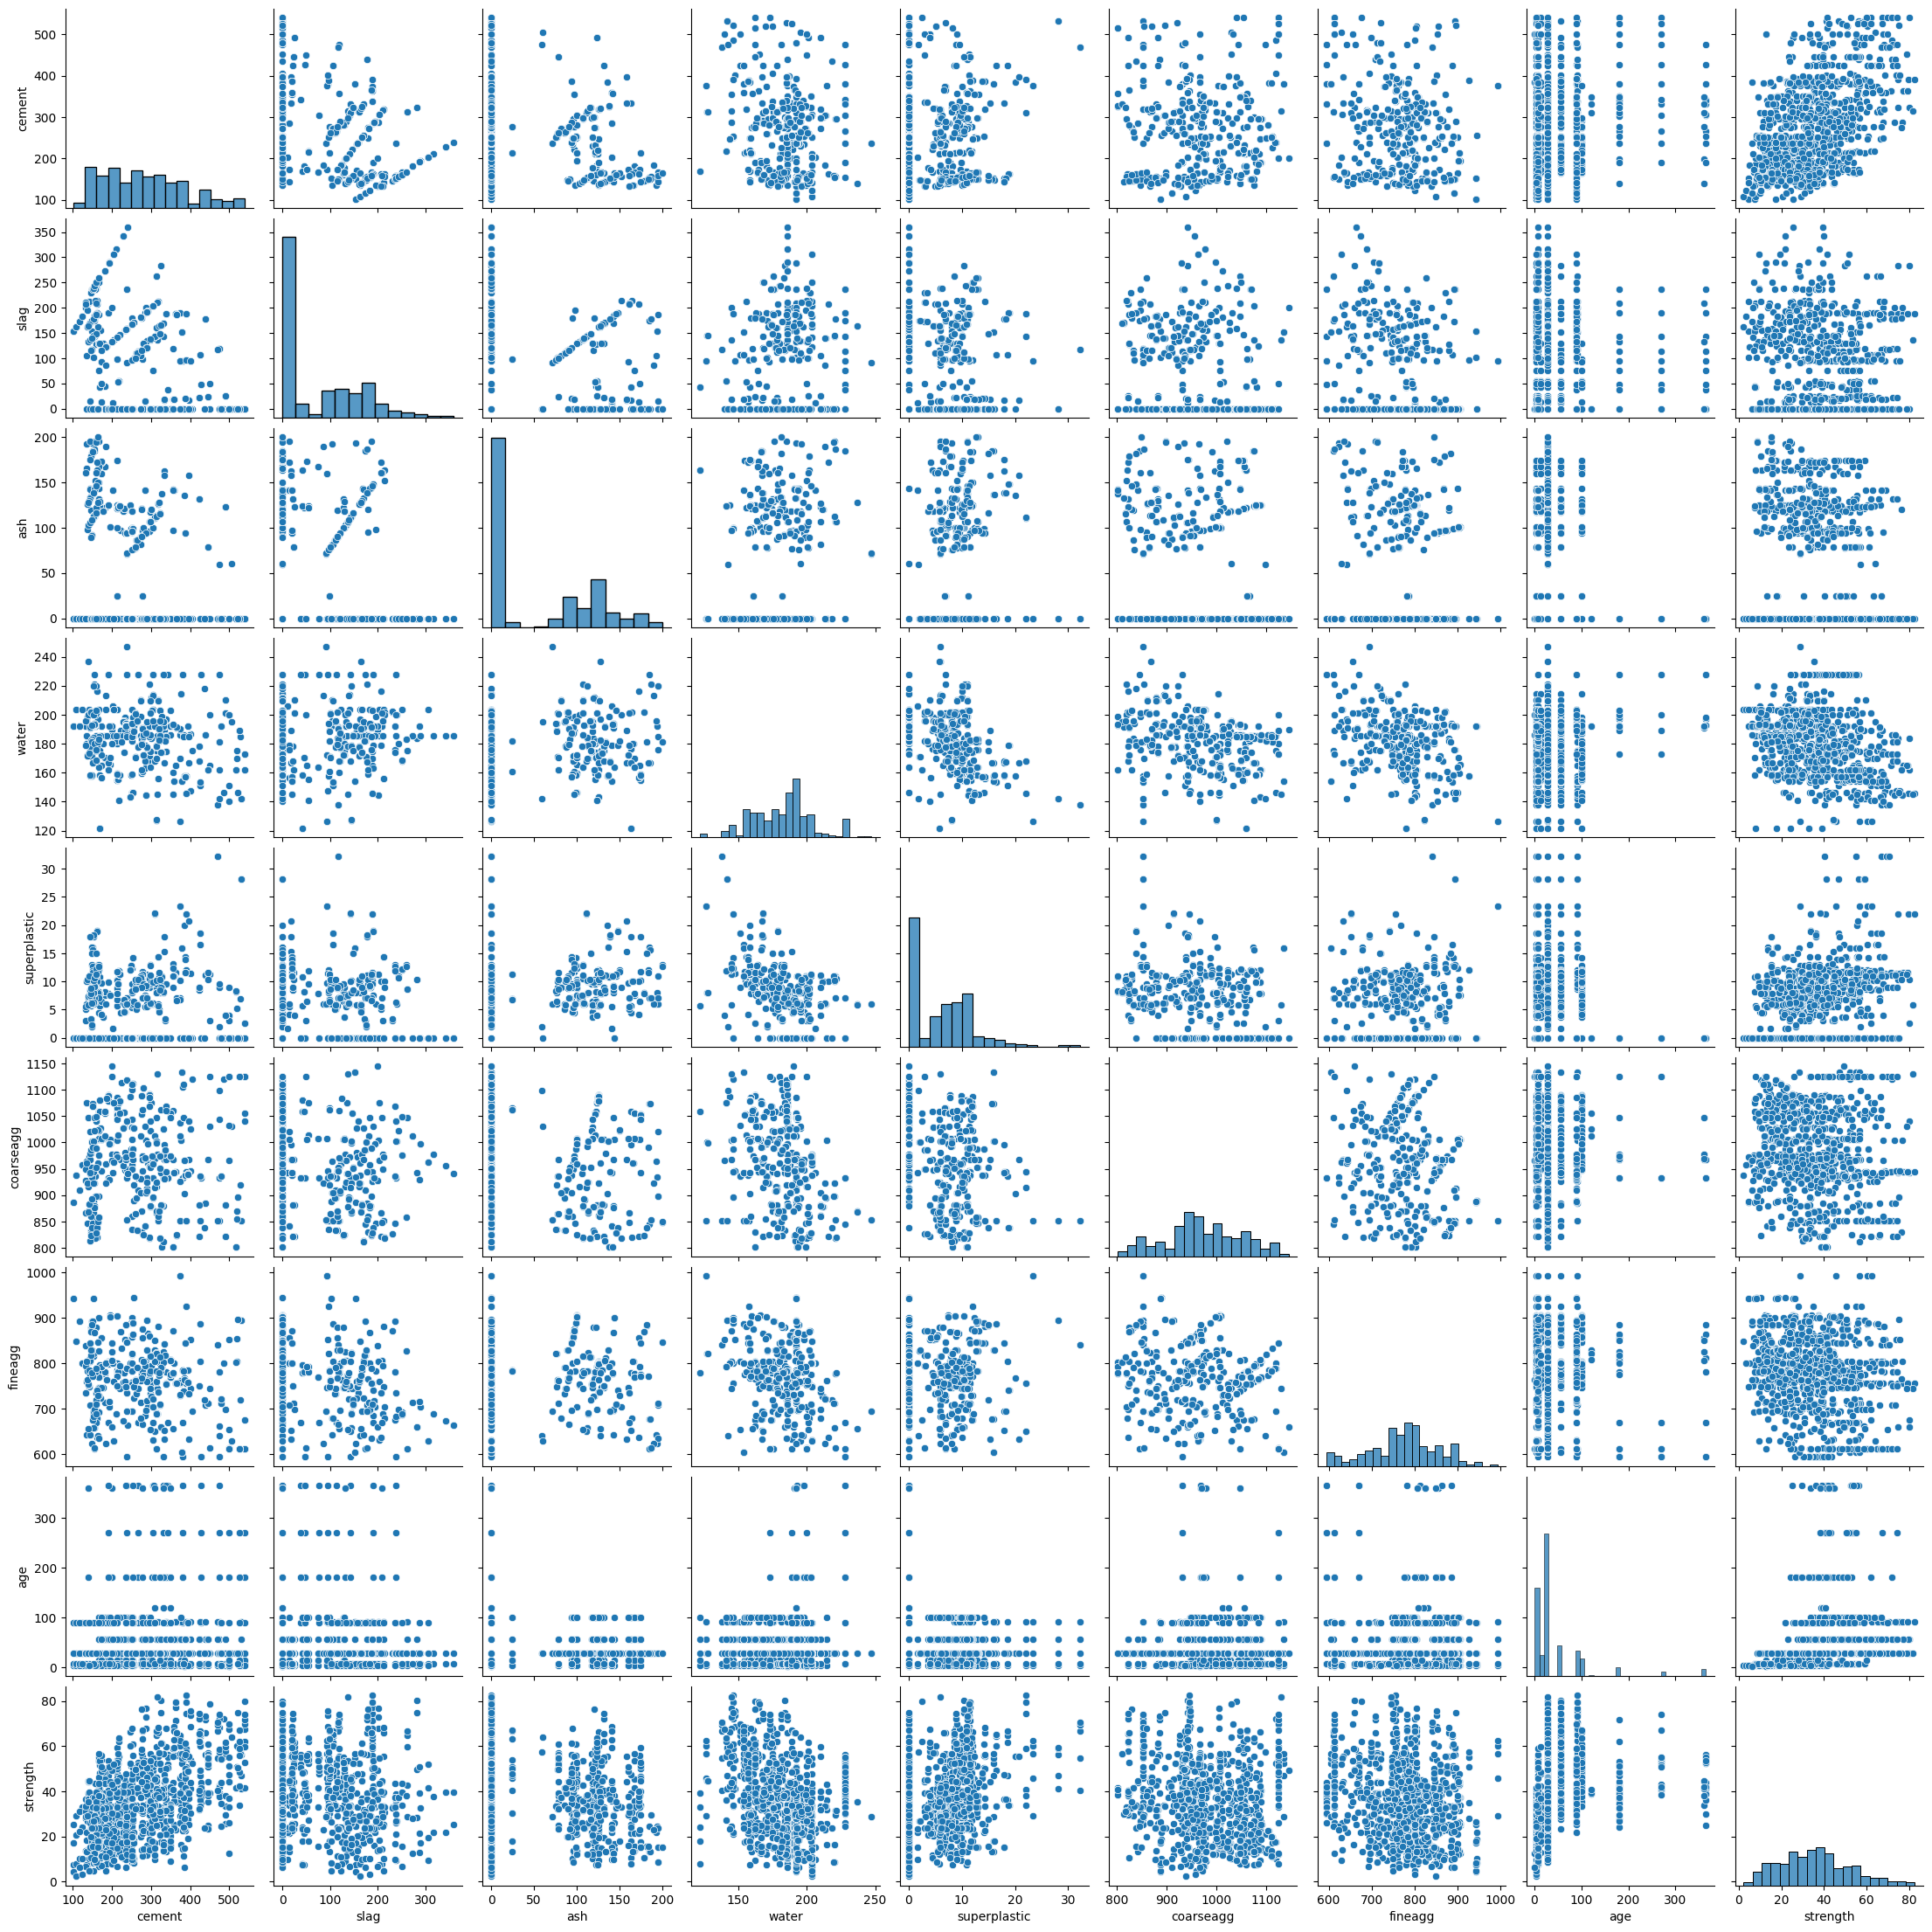

In [ ]:
sns.pairplot(data)
data.corr()


(array([540.,  41.,  89., 104.,  87., 112.,  28.,  13.,  12.,   4.]),
 array([  0.  ,  35.94,  71.88, 107.82, 143.76, 179.7 , 215.64, 251.58,
        287.52, 323.46, 359.4 ]),
 <BarContainer object of 10 artists>)

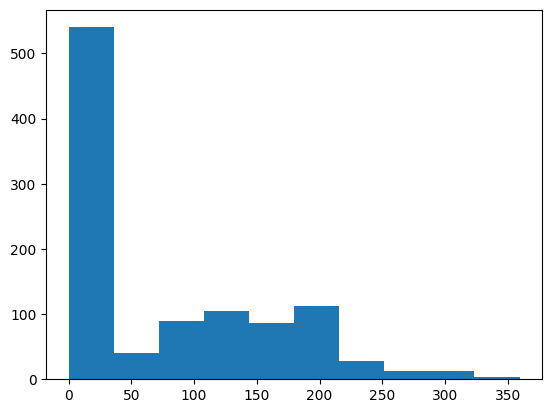

In [12]:
plt.hist(data["slag"])

# **Split des données**

In [59]:
target = data.strength

In [58]:
colonnes = data.drop("strength", axis = 1)
colonnes

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


## **Split des données**

In [ ]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(colonnes, target, test_size=0.3, random_state=123)

# **Preprocessing**

In [ ]:
# Preprocessing

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#prepo = MinMaxScaler()
scale = StandardScaler()

In [ ]:
#X_train_process = prepo.fit_transform(X_train)
#X_test_process = prepo.transform(X_test)

In [71]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# **Entrainement du modèle**

In [72]:
# Entrainement du modèle

from sklearn.ensemble import RandomForestRegressor

In [73]:
model = RandomForestRegressor()

In [74]:
#model.fit(X_train_process, y_train)
model.fit(X_train_scaled, y_train)

RandomForestRegressor()

# **Evaluation du modèle**

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
#y_pred = model.predict(X_test_process)
y_pred = model.predict(X_test_scaled)

In [80]:
mean_absolute_error(y_test, y_pred)

3.555572816304516

In [81]:
r2_score(y_test, y_pred)

0.8947041324762854

# **Sauvegarde du modèle**

In [83]:
import joblib

In [84]:
joblib.dump(model, 'modelML.pkl')

['modelML.pkl']

In [1]:
"""model = joblib.load("modelML.pkl")

y_pred = model.predict(X_test_scaled)
mean_absolute_error(y_test, y_pred)
r2_score(y_test, y_pred)
"""

'model = joblib.load("modelML.pkl")\n\ny_pred = model.predict(X_test_scaled)\nmean_absolute_error(y_test, y_pred)\nr2_score(y_test, y_pred)\n'